In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collecting

In [2]:
def load_dataset():
    file = ("2020.csv")
    df = pd.read_csv(file)
    return df

load_dataset()

,Google Cloud Region,Location,Google CFE,Lifecycle grid carbon intensity (gCO2eq / kWh)
0,asia-east1,Taiwan,0.18,540
1,asia-east2,Hong Kong,NaN,453
2,asia-northeast1,Tokyo,0.12,554
3,asia-northeast2,Osaka,NaN,442
4,asia-northeast3,Seoul,0.31,457
5,asia-south1,Mumbai,0.12,721
6,asia-south2,Delhi,NaN,657
7,asia-southeast1,Singapore,0.04,493
8,asia-southeast2,Jakarta,NaN,647
9,australia-southeast1,Sydney,0.11,727


In [3]:
def print_summarize_dataset(df):
    print("Data Types:")
    print(df.dtypes)
    print()
    print("Statistical summary:")
    display(df.describe())
    
df = load_dataset()
print_summarize_dataset(df)
    

Data Types:
Google Cloud Region                                object
Location                                           object
Google CFE                                        float64
Lifecycle grid carbon intensity (gCO2eq / kWh)      int64
dtype: object

Statistical summary:


,Google CFE,Lifecycle grid carbon intensity (gCO2eq / kWh)
count,19.000000,27.000000
mean,0.473684,411.629630
std,0.314929,210.861082
min,0.040000,27.000000
25%,0.185000,242.000000
50%,0.540000,454.000000
75%,0.710000,547.000000
max,0.940000,727.000000


# Data Exploration

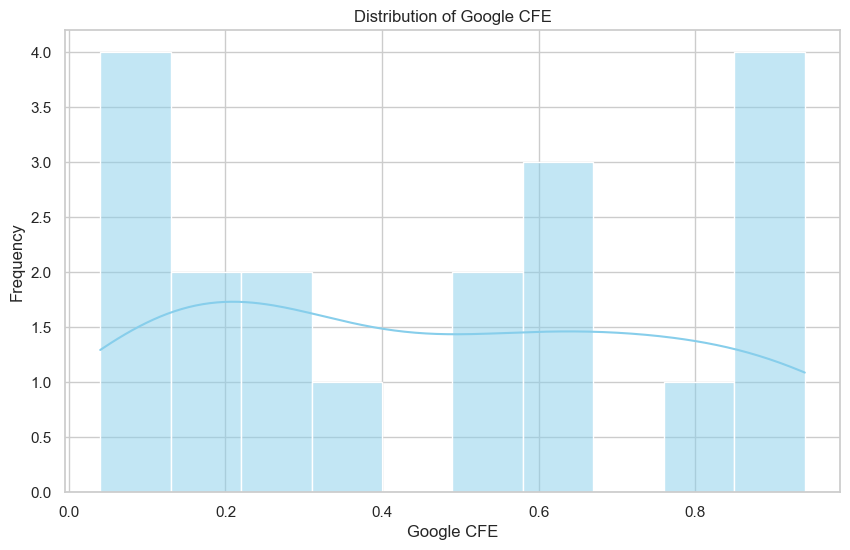

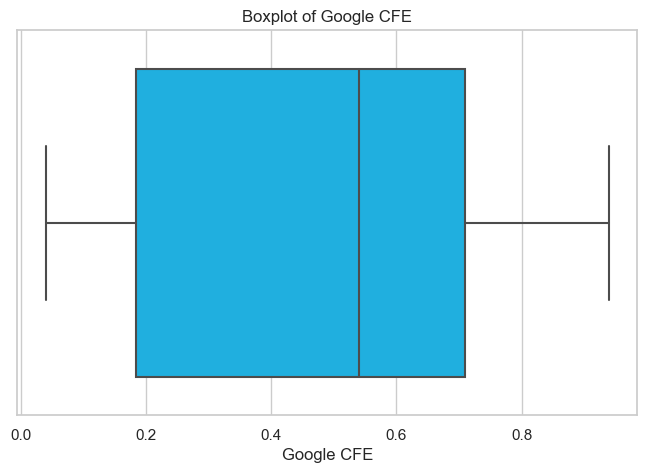

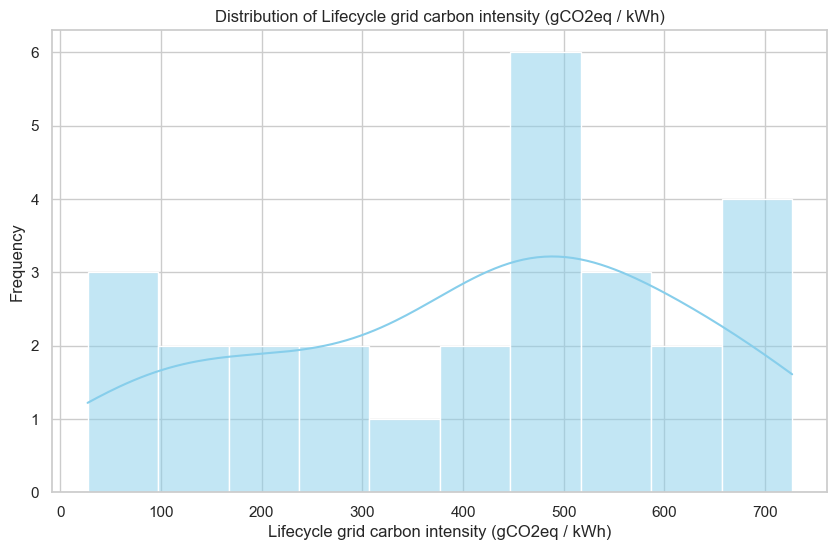

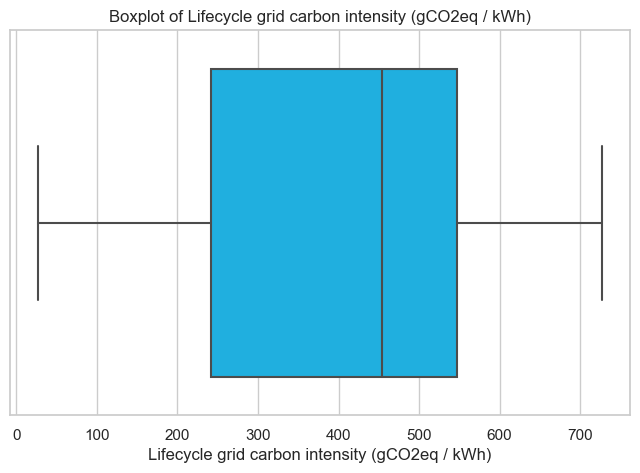

In [6]:
def print_histograms(df):
    columns = ['Google CFE', 'Lifecycle grid carbon intensity (gCO2eq / kWh)']
    sns.set(style="whitegrid", palette="pastel")
    
    for column in columns:
        #Histograms
        plt.figure(figsize=(10,6))
        sns.histplot(df[column], kde=True, color='skyblue', bins=10)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        
        #Boxplot
        plt.figure(figsize=(8,5))
        sns.boxplot(x=df[column], color='deepskyblue')
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()
        
print_histograms(df)
        

#### Interpretación de los Histogramas
##### Histograma de Google CFE (Carbon Free Energy):
##### Distribución: El histograma muestra una distribución algo bimodal con picos en las zonas de 0.1-0.2 y 0.6-0.8. Esto sugiere que hay dos grupos distintos de regiones: algunas con bajo porcentaje de energía libre de carbono (Google CFE), y otras con un porcentaje relativamente más alto.
##### Comparación con 2019: Comparado con los datos de 2019, la distribución parece haber cambiado ligeramente. En 2019, la distribución también tenía picos en las zonas de valores bajos y altos, pero en 2020, los picos son más pronunciados y la distribución parece estar más dispersa.
##### Insight: Podría ser interesante investigar qué regiones están en los picos bajos y altos, y si hay políticas, cambios tecnológicos o factores externos que influyen en estos cambios.

##### Histograma de Lifecycle Grid Carbon Intensity (gCO2eq / kWh):
##### Distribución: La distribución de la intensidad de carbono tiene un pico alrededor de 500 gCO2eq/kWh, similar al año 2019. Sin embargo, también hay una dispersión significativa en los valores más bajos y más altos (cerca de 100 y 700), lo que sugiere que algunas regiones tienen una huella de carbono mucho mayor o menor que otras.
##### Comparación con 2019: Comparado con el histograma de 2019, la forma general parece similar, con un pico alrededor de 500, pero hay diferencias en la cantidad de regiones con intensidades muy altas o bajas.
##### Insight: La variabilidad en los extremos sugiere que algunas regiones pueden haber cambiado significativamente sus fuentes de energía o prácticas de sostenibilidad en 2020.

#### Conclusiones Generales:
##### Diferencias en la Distribución Interna: Aunque los boxplots sugieren que los rangos generales de los datos no han cambiado significativamente entre 2019 y 2020, los histogramas muestran que la distribución interna de los valores ha cambiado. Esto podría indicar variaciones en las prácticas energéticas o políticas en ciertas regiones.
##### Importancia de los Detalles Regionales: Las diferencias en los histogramas sugieren que puede ser valioso realizar un análisis más profundo a nivel regional para identificar qué regiones han experimentado cambios significativos.
##### Próximos Pasos: Continuar con un análisis regional para identificar cambios en las prácticas de sostenibilidad entre 2019 y 2020. También considerar realizar un análisis de correlación para 2020 como se hizo para 2019, para ver si la relación entre Google CFE y Lifecycle grid carbon intensity sigue siendo consistente.

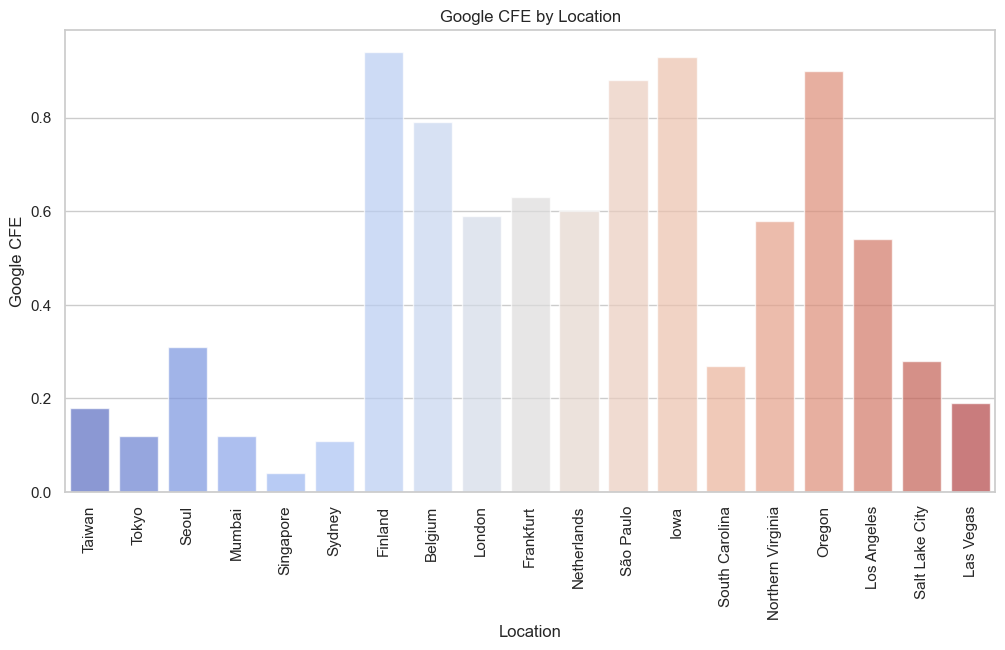

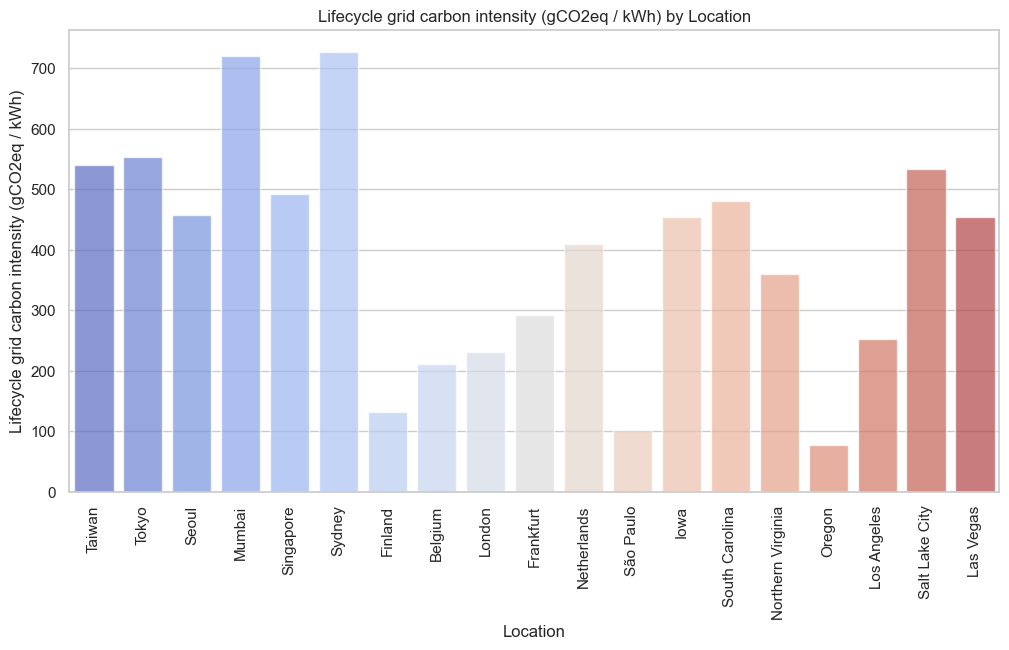

In [19]:
def bar_chart(df):
    df = df.dropna(subset=['Google CFE', 'Lifecycle grid carbon intensity (gCO2eq / kWh)'])
    
    columns = ['Google CFE', 'Lifecycle grid carbon intensity (gCO2eq / kWh)']
    
    for column in columns:
        plt.figure(figsize=(12,6))
        sns.barplot(x='Location', y=column, data=df, palette='coolwarm', alpha=0.7)
        plt.xticks(rotation=90)
        plt.title(f'{column} by Location')
        plt.xlabel('Location')
        plt.ylabel(column)
        plt.show()

bar_chart(df)
        

#### Evaluación del Resultado
##### Gráfico de Barras de Google CFE por Ubicación:
##### Interpretación Correcta: El gráfico muestra claramente el porcentaje de energía libre de carbono (Google CFE) por ubicación. Se puede ver que algunas regiones, como Finlandia e Iowa, tienen valores muy altos de Google CFE, lo que indica que están utilizando una mayor proporción de energía libre de carbono. Por otro lado, regiones como Tokio y Seúl tienen valores más bajos.
##### Objetivo Logrado: Este gráfico cumple el objetivo de identificar visualmente las regiones con altos y bajos niveles de Google CFE. Puedes ver fácilmente qué ubicaciones se destacan y podrías investigar más sobre las razones detrás de estas diferencias.
##### Gráfico de Barras de Lifecycle Grid Carbon Intensity (gCO2eq / kWh) por Ubicación:
##### Interpretación Correcta: Este gráfico muestra la intensidad de carbono de la red energética en gCO2eq/kWh para cada ubicación. Puedes observar que Mumbai y Sydney tienen las intensidades más altas, mientras que Zurich y Montreal tienen las más bajas.
##### Objetivo Logrado: Este gráfico también cumple el objetivo de visualizar claramente las ubicaciones con alta y baja intensidad de carbono, lo que es útil para analizar qué regiones pueden necesitar más optimización o cambios en sus políticas energéticas.

In [15]:
import folium
from folium.plugins import HeatMap

In [17]:
# Define a function to create a geographic heat map
def geographic_heat_map(df):
    # Dictionary of approximate coordinates for each Google Cloud region
    coordinates = {
        'asia-east1': (25.0330, 121.5654),  # Taiwan
        'asia-east2': (22.3193, 114.1694),  # Hong Kong
        'asia-northeast1': (35.6895, 139.6917),  # Tokyo
        'asia-northeast2': (34.6937, 135.5023),  # Osaka
        'asia-northeast3': (37.5665, 126.9780),  # Seoul
        'asia-south1': (19.0760, 72.8777),  # Mumbai
        'asia-southeast1': (1.3521, 103.8198),  # Singapore
        'asia-southeast2': (-6.2088, 106.8456),  # Jakarta
        'australia-southeast1': (-33.8688, 151.2093),  # Sydney
        'europe-north1': (60.1699, 24.9384),  # Finland
        'europe-west1': (50.8503, 4.3517),  # Belgium
        'europe-west2': (51.5074, -0.1278),  # London
        'europe-west3': (50.1109, 8.6821),  # Frankfurt
        'europe-west4': (52.3676, 4.9041),  # Netherlands
        'europe-west6': (47.3769, 8.5417),  # Zurich
        'northamerica-northeast1': (45.5017, -73.5673),  # Montreal
        'southamerica-east1': (-23.5505, -46.6333),  # Sao Paulo
        'us-central1': (41.8780, -93.0977),  # Iowa
        'us-east1': (33.8361, -81.1637),  # South Carolina
        'us-east4': (39.0438, -77.4874),  # Northern Virginia
        'us-west1': (45.5234, -122.6762),  # Oregon
        'us-west2': (34.0522, -118.2437),  # Los Angeles
        'us-west3': (40.7608, -111.8910),  # Salt Lake City
        'us-west4': (36.1699, -115.1398)   # Las Vegas
    }
    
    # Create a pandas DataFrame with the added coordinates
    df['Coordinates'] = df['Google Cloud Region'].map(coordinates)
    
    # Create a basemap centered on mean coordinates
    map_center = [20, 0] # Approximate center of the map
    m = folium.Map(location=map_center, zoom_start=2)
    
    # Create a list of data for the heat map
    heat_data = [[row['Coordinates'][0], row['Coordinates'][1], row['Lifecycle grid carbon intensity (gCO2eq / kWh)']] 
                 for index, row in df.dropna(subset=['Coordinates', 'Lifecycle grid carbon intensity (gCO2eq / kWh)']).iterrows()]
    
    # Add the HeatMap to the map
    HeatMap(heat_data, radius=15).add_to(m)
    
    return m

geographic_map = geographic_heat_map(df)
geographic_map.save("geographic_heat_map_2020.html") # Save the map as HTML file

In [18]:
def compute_correlations_matrix(df):
    columns = ['Google CFE', 'Lifecycle grid carbon intensity (gCO2eq / kWh)']
    correlations = df[columns].corr(method='pearson')
    return correlations

compute_correlations_matrix(df)

,Google CFE,Lifecycle grid carbon intensity (gCO2eq / kWh)
Google CFE,1.000000,-0.832981
Lifecycle grid carbon intensity (gCO2eq / kWh),-0.832981,1.000000
